# Assignment

Repeat the training and prediction workflow as above for two other features in the data, namely: Systole and Diastole values. Use 70 training and 30 testing samples where the labels are assigned according to the condition: 0 if 'non-smoker', 1 if 'smoker'.

Use the above code to 
- train the random forest classifier
- create state space plots with scatter plot, categorical colouring, and probability contour plot
- compare the predicted and actual labels to check how well the trained model performed: how many of the 30 test data points are correctly predicted?
- plot the feature importances to check how much the systolic and diastolic values contributed to the predictions. 


In [2]:
from pandas import read_csv

from numpy import arange, asarray, linspace, c_, meshgrid, zeros, ones
from numpy.random import uniform, seed

from matplotlib.pyplot import subplots, scatter, xlabel, ylabel, xticks

from sklearn.ensemble import RandomForestClassifier

In [3]:
# check data & assign variables 
data = read_csv('data/patients_data.csv'); print(data)
training = 70 # 70 training samples
data_np = data.to_numpy() # convert to numpy array
x = data_np[:training, [3, 4]] # Assign systolic & diastolic for x axis
boolean_smoke = data['Smoker'] == 1; y = boolean_smoke[:training] # change smoking status to binary option and set as training samples

# Train random forest with input values
random_seed = 12345 # random generation according to https://en.wikipedia.org/wiki/Pseudorandom_number_generator
clf = RandomForestClassifier(random_state=random_seed)
clf.fit(x, y)
x_update = data_np[training:, [3, 4]]
new_pre = clf.predict(x_update); new_prob = clf.predict_proba(x_update)
print(f'Predictions: {new_pre} probabilities of predictions: {new_prob}')

    Age  Height  Weight  Systolic  Diastolic  Smoker  Gender
0    38      71     176       124         93       1    Male
1    43      69     163       109         77       0    Male
2    38      64     131       125         83       0  Female
3    40      67     133       117         75       0  Female
4    49      64     119       122         80       0  Female
..  ...     ...     ...       ...        ...     ...     ...
95   25      69     171       128         99       1    Male
96   44      69     188       124         92       1    Male
97   49      70     186       119         74       0    Male
98   45      68     172       136         93       1    Male
99   48      66     177       114         86       0    Male

[100 rows x 7 columns]
Predictions: [False False False False False False False False False False False False
  True  True False  True  True  True False False  True False  True False
  True  True  True False  True False] probabilities of predictions: [[0.93       0.07

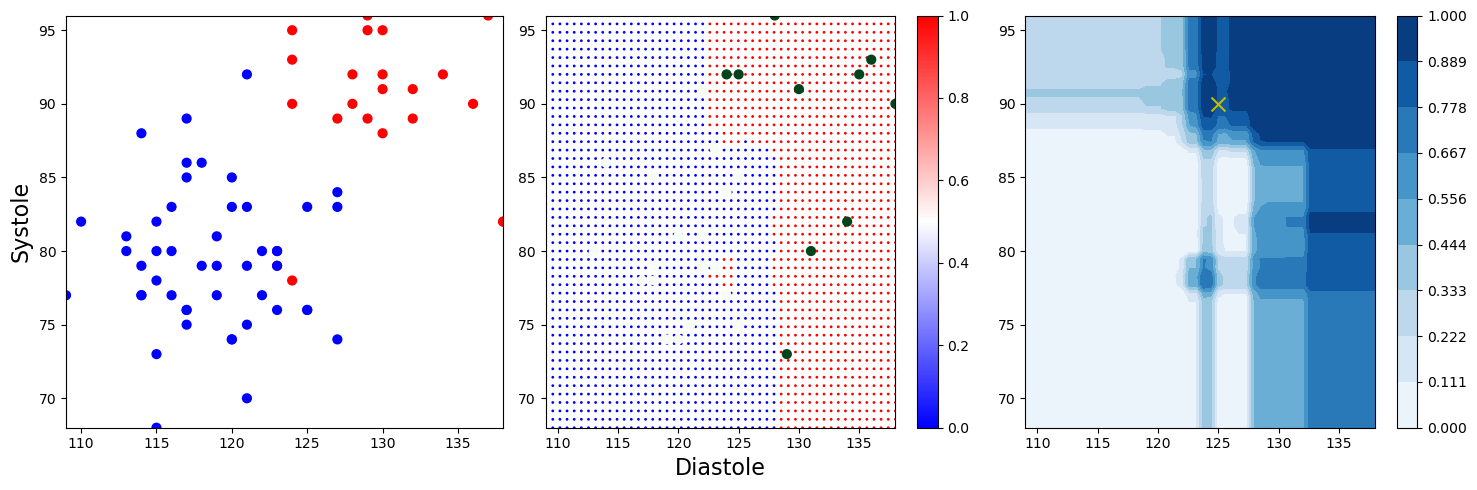

In [7]:
# Create state space, scatter and contour plots
X1_min, X1_max = min(x[:, 0]), max(x[:, 0]); X2_min, X2_max = min(x[:, 1]), max(x[:, 1]) # set scale for x axis 
vec_a = linspace(X1_min, X1_max); vec_b = linspace(X2_min, X2_max) # vector space
grid_a, grid_b = meshgrid(vec_a, vec_b); grid_a_flat = grid_a.ravel(); grid_b_flat = grid_b.ravel()
X_statespace = c_[grid_a_flat, grid_b_flat]

predict = clf.predict(X_statespace)
probabs = clf.predict_proba(X_statespace)

feature_1, feature_2 = 0, 1
fig, ax = subplots(ncols=3, nrows=1, figsize=(15, 5))

ax[0].scatter(x[:, feature_1], x[:, feature_2], c=y, s=40, cmap='bwr'); ax[0].set_xlim(X1_min, X1_max); ax[0].set_ylim(X2_min, X2_max);ax[0].set_ylabel('Systole', fontsize=16);

cax1 = ax[1].scatter(X_statespace[:, feature_1], X_statespace[:, feature_2], c=predict, s=1, cmap='bwr'); ax[1].scatter(x_update[:, feature_1], x_update[:, feature_2], c=new_pre, s=40, cmap='Greens');
ax[1].set_xlabel('Diastole', fontsize=16); ax[1].set_xlim(X1_min, X1_max); ax[1].set_ylim(X2_min, X2_max); fig.colorbar(cax1, ax=ax[1]); grid_shape = grid_a.shape; probab_grid = probabs[:, 1].reshape(grid_shape)

sys, dia = 125, 90 # plot for contour - 125s, 90d 
test_sample = [sys, dia]
contour_levels = linspace(0, 1, 10)
cax2 = ax[2].contourf(grid_a, grid_b, probab_grid, cmap='Blues', levels=contour_levels);
fig.colorbar(cax2, ax=ax[2]);
ax[2].scatter(test_sample[0], test_sample[1], c='y', marker='x', s=100); ax[2].set_xlim(X1_min, X1_max); ax[2].set_ylim(X2_min, X2_max);

fig.tight_layout()

[False  True] [[0.14 0.86]]


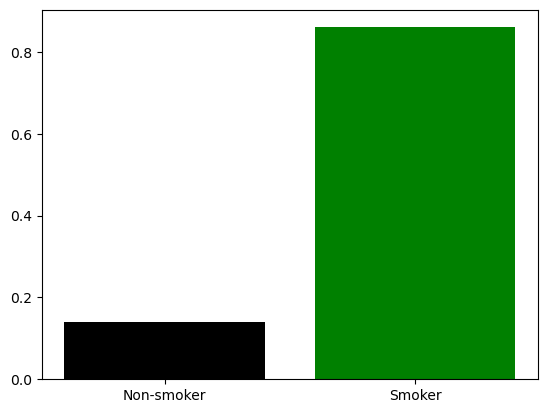

In [8]:
check = [[sys, dia]]; proba = clf.predict_proba(check); print(clf.classes_, proba)
bins = arange(proba.shape[1])

fig, ax = subplots()
ax.bar(bins, proba[0,:], color=('black', 'green'));
xticks(bins, ('Non-smoker', 'Smoker'), fontsize=10);

# I am not entirely sure this is correct after checking the answer in the ML class 1 documentation =( not comparing well against the actually data, but not sure why

Feature 1: 58.0%; Feature 2: 42.0%


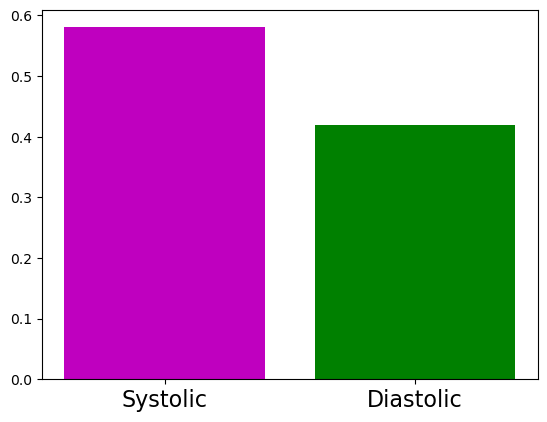

In [9]:
importances = clf.feature_importances_
temp = 'Feature 1: {:.1f}%; Feature 2: {:.1f}%'

print(temp.format(importances[0]*100, importances[1]*100))

bins = arange(importances.shape[0])

fig, ax = subplots()

ax.bar(bins, importances, color=('m', 'g'));
xticks(bins, ('Systolic', 'Diastolic'), fontsize=16);